# 「魔円陣と有限幾何」（秋山茂樹）に登場する魔円陣を試す
### $p=17,e=1$で「ガロアの問題の一つの解」となるやつ

In [1]:
println(versioninfo())
using Nemo,Plots

Julia Version 1.10.4
Commit 48d4fd48430 (2024-06-04 10:41 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin22.4.0)
  CPU: 8 × Apple M3
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, apple-m1)
Threads: 1 default, 0 interactive, 1 GC (on 4 virtual cores)
nothing

Welcome to Nemo version building

Nemo comes with absolutely no warranty whatsoever


In [2]:
p,n=17,3
Fpn,x=finite_field(p,n,"x")
println(defining_polynomial(Fpn))

x^3 + x + 14


「$F_{17^3}$ は $F_{17}$ 係数の多項式の全体を $x^3+3x^2+1$ で割った余りの集合である。」と「魔円陣と有限幾何」には...  
でも, **Nemo.jl** は $x^3+x+14$ を提示してきた。果たして...

In [3]:
mclst=[]
for i=1:p^3
    xn=(x+1)^i
    if coeff(xn,2)==0
        println(i," : ", xn)
        push!(mclst,i)
        if coeff(xn,1)==0
            break
        end
    end
end
println("(",join(mclst,","),") : size=",length(mclst))
    

1 : x + 1
38 : 3*x + 8
49 : 7*x + 5
73 : 10*x + 2
99 : 12*x + 2
115 : 8*x
144 : 6*x + 3
167 : 7*x + 16
185 : 10*x + 3
218 : 5*x + 16
224 : 15*x + 12
232 : 13*x + 10
245 : 16*x + 4
249 : 4*x + 3
252 : 10*x + 14
254 : 11*x + 10
264 : 16*x + 1
307 : 5
(1,38,49,73,99,115,144,167,185,218,224,232,245,249,252,254,264,307) : size=18


「原始根の位数は $17^3 − 1$ まであるが、射影直線は $17^2 + 17 + 1 = 307$ しかない。  
実際 $(x + 1)^{307} = 14$ となってこれは射影平面では $1$ と同じ点であり、ここで循環する。」とある。  
生成多項式（既約多項式）が別だけど, 書いてある通り,   
「原始根はここでも $x + 1$ でよく、同じように $1,\ x$ で生成される射影直線を原始根の冪で表す」とすると上のようになる。  
「したがって大きさ 18 の魔円陣として $(2,24,15,4,16,12,25,38,50,14,17,5,8,10,11,49,6,1)$ が出来た。」とあるが違うものが得られた。  
果たしてこれは魔円陣となっているのか。

In [4]:
dsl=mclst.-1
push!(dsl,p^2+p+1)
println(dsl)
bbl=[]
for i=1:length(dsl)-1
    push!(bbl,dsl[i+1]-dsl[i])
end
l=length(bbl)
println("(",join(bbl,", "),") : ",l)
bsl=[]
for i=1:l
    bs=bbl[i]
    push!(bsl,bs)
    for j=1:l-2
        bs=bs+bbl[(i+j-1)%l+1]
        push!(bsl,bs)
    end
end
push!(bsl,sum(bbl))
println(sort(bsl)," : ",length(bsl)," , ",length(unique(bsl)))

[0, 37, 48, 72, 98, 114, 143, 166, 184, 217, 223, 231, 244, 248, 251, 253, 263, 306, 307]
(37, 11, 24, 26, 16, 29, 23, 18, 33, 6, 8, 13, 4, 3, 2, 10, 43, 1) : 18
Any[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 18

先ず, 魔円陣として得られた配列から, ビリヤード問題の解の配列を「差をとって」作る。  
で, その配列の隣接項の和を取り, $1$から$p^2+p+1=307$迄ユニークに現れるかをチェックした。  
上手く構成できているようだ。  
「確かにこの答えは簡単には見つかりそうにない」という事は同意するけど, 他の解は簡単に得られそうだ。  

上で得られた「完全差集合」について, 各要素を $k$ 倍して, $\sigma=p^2+p+1$の剰余をとる。  
$k=2$ から $\sigma$ まで。そして, それをソートした配列を作り, そこから隣り合う項の「差をとって」ビリヤード問題の解にする。  
沢山出てくるが当然重複するので, $1$ の位置を最初にして, 第2項は末項よりは小さくなるよう並べ替えて, 重複していれば数えないこととする。

In [5]:
σ=p^2+p+1
bbAns=[]
for i=2:σ-1
    mclstA=(mclst.*i).%σ
    sort!(mclstA)
#    println(mclstA)
    dsl=mclstA
    push!(dsl,σ)
#    println(dsl)
    bbl=[]
    for i=1:length(dsl)-1
        push!(bbl,dsl[i+1]-dsl[i])
    end
#    println(" >> (",join(bbl,","),")")
#    println("(",join(bbl,", "),")")
    while bbl[1]>1
        bbl=circshift(bbl, 1)
    end
    if bbl[2]>bbl[end]
        bbl=circshift(reverse(bbl),1)
    end
    if !(bbl ∈ bbAns)
        push!(bbAns,bbl)
        println(length(bbAns)," (",join(bbl,", "),")")
    end
end

1 (1, 3, 20, 9, 58, 19, 2, 25, 36, 13, 22, 31, 12, 5, 11, 26, 8, 6)
2 (1, 5, 9, 8, 4, 7, 32, 24, 18, 2, 35, 3, 10, 49, 29, 25, 16, 30)
3 (1, 17, 9, 31, 6, 2, 12, 16, 5, 47, 3, 4, 15, 10, 13, 11, 62, 43)
4 (1, 4, 3, 36, 23, 6, 18, 22, 9, 2, 19, 63, 14, 34, 16, 10, 15, 12)
5 (1, 4, 27, 43, 6, 11, 2, 7, 3, 18, 16, 8, 14, 39, 25, 33, 15, 35)
6 (1, 6, 9, 32, 18, 5, 14, 21, 4, 13, 11, 91, 2, 8, 12, 31, 3, 26)
7 (1, 2, 27, 7, 13, 5, 21, 22, 19, 12, 4, 24, 32, 10, 23, 71, 6, 8)
8 (1, 5, 22, 24, 12, 13, 8, 26, 9, 30, 2, 29, 19, 53, 37, 3, 4, 10)
9 (1, 12, 36, 19, 25, 7, 11, 4, 5, 30, 3, 21, 2, 8, 6, 72, 17, 28)
10 (1, 2, 20, 6, 12, 47, 15, 30, 27, 21, 4, 39, 7, 10, 34, 19, 5, 8)
11 (1, 5, 14, 4, 22, 12, 9, 50, 27, 51, 3, 8, 2, 15, 16, 32, 7, 29)
12 (1, 5, 2, 25, 4, 12, 44, 34, 18, 20, 19, 26, 21, 3, 11, 40, 13, 9)
13 (1, 4, 16, 7, 17, 25, 8, 26, 3, 6, 13, 39, 2, 12, 18, 64, 36, 10)
14 (1, 3, 34, 2, 45, 7, 18, 5, 48, 16, 10, 57, 6, 13, 14, 8, 9, 11)
15 (1, 4, 2, 16, 12, 13, 8, 24, 38, 44, 15, 27

無事に17番目の解が「魔円陣と有限幾何」にある「$p=17,e=1$で「ガロアの問題の一つの解」となるやつ」となっている。目出度目出度か。  
この18個の場合のビリヤード問題の解は $p=17,\ e=1$ で総和は	$307$ で $51$ 種類あるとどこかに書いてあったから, 列挙もできてるし上出来か。  
折角だから, **Plots.jp** を使って図も描いて貰った。  
図の描き方は, **ChatGpt** に助けて貰った。

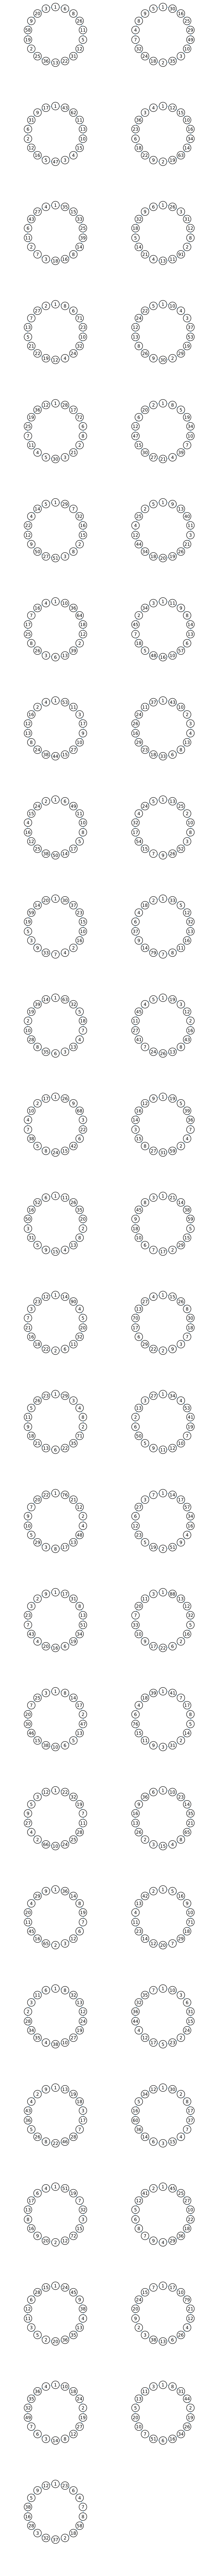

In [29]:
function draw_circles_on_circumference(n::Int, R::Float64, r::Float64, labels::Vector{String})
    theta = 2 * π / n  # 角度の増分
    x_coords = [R * cos(i * theta+π/2) for i in 0:n-1]  # x,y座標
    y_coords = [R * sin(i * theta+π/2) for i in 0:n-1]
    p = plot(legend=false, aspect_ratio=:equal,size=(600,400),xlims=(-R-4r, R+4r), ylims=(-R-4r, R+4r), framestyle=:none, grid=false, axis=false)
    # 大きな円の描画
    circle_x = [R * cos(t) for t in range(0, stop=2π, length=100)]
    circle_y = [R * sin(t) for t in range(0, stop=2π, length=100)]
    plot!(p, circle_x, circle_y, line=:solid)
    # 小さな円の描画
    for (i, (x, y)) in enumerate(zip(x_coords, y_coords))
        scatter!(p, [x], [y], markershape=:circle, markersize=20, color=:white, label=false)
        annotate!(p, x, y, text(labels[i], :center, 14, :black))
    end
    return p
end
n = length(bbl)         # 小さな円の数
R = 10.0      # 大きな円の半径
r = 0.4       # 小さな円の半径
labels=[]
for i=1:length(bbAns)
    push!(labels,string.(bbAns[i]))  # ラベルの配列
end
#println(labels)
#p = draw_circles_on_circumference(n, R, r)
# 各図を作成
#p=[]
#for i=1:length(bbAns)
#    push!(p,draw_circles_on_circumference(n, R, r, labels[i]))
#end
## 図を並べて表示
##plot(p[1], p[2], layout=(1, 2))
#for i=1:1#length(bbAns)
#    plot(p[i*2-1], p[i*2], layout=(1, 2))
#    #display(p)
#end
# 各図を作成
plots = [draw_circles_on_circumference(n, R, r, labels[i]) for i in 1:51]
# 図を並べて表示
plot(plots..., layout=(26, 2), size=(1000, 12000))
